In [1]:
#importing libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_salary=pd.read_csv('empl.csv')

In [3]:
df_salary

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [4]:
df_salary.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [5]:
df_salary.columns

Index(['SNo', 'Name', 'Age', 'City', 'Country', 'Salary'], dtype='object')

In [6]:
#check null values without visualisation
df_salary.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [7]:
df_salary.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


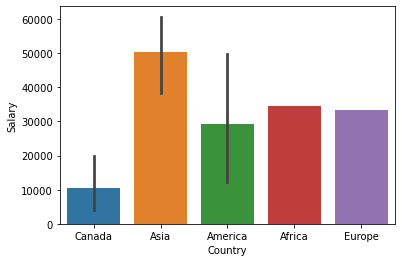

In [8]:
#Graphical analysis
sns.barplot(x="Country",y="Salary",data=df_salary)
plt.show()

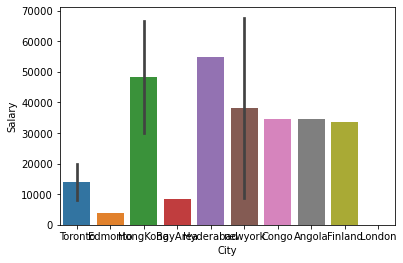

In [9]:
sns.barplot(x="City",y="Salary",data=df_salary)
plt.show()

In [10]:
#Imputing null values
df_salary["City"].fillna("No City", inplace = True)
df_salary

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,No City,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [11]:
impute=["Age"]
for col in impute:
    if df_salary[col].dtype!="object":
        df_salary[col].fillna(df_salary[col].mean(),inplace=True)
   

In [12]:
# checking the null values again
df_salary.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [13]:
#For salary we have to impute by groupping it with country
df_salary_grby_country=df_salary.groupby(["Country"]).agg({"Salary":"mean"})
for index in df_salary_grby_country.index:
    df_salary.loc[df_salary["Country"]==index,["Salary"]]=df_salary.loc[df_salary["Country"]==index,["Salary"]].fillna(df_salary_grby_country.loc[index])

In [14]:
df_salary.isnull().sum()
#all null values are imputed

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [15]:
df_salary.round(2)

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.00,Toronto,Canada,20000.00
1,2,Lee,31.00,Edmonto,Canada,3900.00
2,3,Dave,34.00,Toronto,Canada,8000.00
3,4,Anik,26.00,HongKong,Asia,66672.00
4,5,kamal,30.00,No City,America,29150.29
5,6,Geet,32.42,HongKong,Asia,30007.00
6,7,Steven,43.00,BayArea,America,8300.00
7,8,Ram,38.00,Hyderabad,Asia,54666.00
8,9,hari,50.00,newyork,America,67666.00
9,11,yami,32.42,newyork,America,8888.00


In [16]:
#dropping s.no and name columns as it will do nothing in predicting salary 
df_salary.drop(columns=["SNo","Name"],inplace=True)
df_salary

,Age,City,Country,Salary
0,28.000000,Toronto,Canada,20000.000000
1,31.000000,Edmonto,Canada,3900.000000
2,34.000000,Toronto,Canada,8000.000000
3,26.000000,HongKong,Asia,66672.000000
4,30.000000,No City,America,29150.285714
5,32.421053,HongKong,Asia,30007.000000
6,43.000000,BayArea,America,8300.000000
7,38.000000,Hyderabad,Asia,54666.000000
8,50.000000,newyork,America,67666.000000
9,32.421053,newyork,America,8888.000000


In [17]:
#checking skewness
df_salary.skew()

Age       1.034732
Salary    0.414595
dtype: float64

In [18]:
age_log=np.log(df_salary['Age'])
age_log.skew()

0.5119462777570402

In [19]:
#converting categorical data into numeric values 
df_salary_final=pd.get_dummies(df_salary,drop_first=True)

In [20]:
df_salary_final

,Age,Salary,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_No City,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,28.000000,20000.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,31.000000,3900.000000,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,34.000000,8000.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,26.000000,66672.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,30.000000,29150.285714,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,32.421053,30007.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,43.000000,8300.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,38.000000,54666.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8,50.000000,67666.000000,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9,32.421053,8888.000000,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [21]:
#separate input and output variables
df_x=df_salary_final.drop(columns=["Salary"])
y=df_salary_final[["Salary"]]

In [22]:
#Scaling input set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x =pd.DataFrame(x,columns=df_x.columns)

In [23]:
#Decision Tree Regressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to random state ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [24]:
regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,df_x,y)

r2 score corresponding to random state  42  is  -0.8988726964915625
r2 score corresponding to random state  43  is  -1.9992702979390926
r2 score corresponding to random state  44  is  -0.7138610246810124
r2 score corresponding to random state  45  is  -6.479839717905853
r2 score corresponding to random state  46  is  0.04352701978331608
r2 score corresponding to random state  47  is  -1.771297808821927
r2 score corresponding to random state  48  is  -1.6924151312847688
r2 score corresponding to random state  49  is  -0.4658240435835943
r2 score corresponding to random state  50  is  -0.6042527944966722
r2 score corresponding to random state  51  is  -0.03581672670759661
r2 score corresponding to random state  52  is  -2.4510026470181305
r2 score corresponding to random state  53  is  -1.5380387408969822
r2 score corresponding to random state  54  is  -0.9327005926794834
r2 score corresponding to random state  55  is  -0.9674191652736837
r2 score corresponding to random state  56  is  0

In [25]:
#using another model KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,7)}
kn_reg = KNeighborsRegressor()
clf = GridSearchCV(kn_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 4}

In [26]:
knr=KNeighborsRegressor(n_neighbors=8)
final_r_state=maxr2_score(knr,x,y)

r2 score corresponding to random state  42  is  -0.015199218844565987
r2 score corresponding to random state  43  is  -0.29866109810819785
r2 score corresponding to random state  44  is  -0.22584315890204487
r2 score corresponding to random state  45  is  -2.36381948474907
r2 score corresponding to random state  46  is  0.2149535495542666
r2 score corresponding to random state  47  is  -0.13359958388932092
r2 score corresponding to random state  48  is  -0.18653959073050896
r2 score corresponding to random state  49  is  -0.024032104317198932
r2 score corresponding to random state  50  is  0.15684220405804394
r2 score corresponding to random state  51  is  -0.19737471843844112
r2 score corresponding to random state  52  is  -0.4299135208917617
r2 score corresponding to random state  53  is  0.18461750595101512
r2 score corresponding to random state  54  is  -0.40897718864110666
r2 score corresponding to random state  55  is  0.010934950479478234
r2 score corresponding to random state  

In [27]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
final_r_state=maxr2_score(lr,df_x,y)

r2 score corresponding to random state  42  is  -1.265320734618804
r2 score corresponding to random state  43  is  -2.2214143710922687
r2 score corresponding to random state  44  is  -0.2854932145650233
r2 score corresponding to random state  45  is  -3.8248294376359135
r2 score corresponding to random state  46  is  -0.08504020052308814
r2 score corresponding to random state  47  is  -1.5885121829511175
r2 score corresponding to random state  48  is  0.25954582071342047
r2 score corresponding to random state  49  is  -0.17423975701966787
r2 score corresponding to random state  50  is  0.06503940837442235
r2 score corresponding to random state  51  is  0.12589875735546563
r2 score corresponding to random state  52  is  -0.682575649585653
r2 score corresponding to random state  53  is  -1.845395957558475
r2 score corresponding to random state  54  is  -0.13163163400834366
r2 score corresponding to random state  55  is  -2.1321294785528657
r2 score corresponding to random state  56  is  

In [28]:
x.round(2)

,Age,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_No City,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,-0.68,-0.22,-0.22,-0.32,-0.22,-0.47,-0.32,-0.22,-0.40,3.16,-0.47,-0.76,-0.61,2.12,-0.32
1,-0.22,-0.22,-0.22,3.16,-0.22,-0.47,-0.32,-0.22,-0.40,-0.32,-0.47,-0.76,-0.61,2.12,-0.32
2,0.24,-0.22,-0.22,-0.32,-0.22,-0.47,-0.32,-0.22,-0.40,3.16,-0.47,-0.76,-0.61,2.12,-0.32
3,-0.99,-0.22,-0.22,-0.32,-0.22,2.12,-0.32,-0.22,-0.40,-0.32,-0.47,-0.76,1.63,-0.47,-0.32
4,-0.37,-0.22,-0.22,-0.32,-0.22,-0.47,-0.32,-0.22,2.52,-0.32,-0.47,1.32,-0.61,-0.47,-0.32
5,-0.00,-0.22,-0.22,-0.32,-0.22,2.12,-0.32,-0.22,-0.40,-0.32,-0.47,-0.76,1.63,-0.47,-0.32
6,1.63,4.58,-0.22,-0.32,-0.22,-0.47,-0.32,-0.22,-0.40,-0.32,-0.47,1.32,-0.61,-0.47,-0.32
7,0.86,-0.22,-0.22,-0.32,-0.22,-0.47,3.16,-0.22,-0.40,-0.32,-0.47,-0.76,1.63,-0.47,-0.32
8,2.71,-0.22,-0.22,-0.32,-0.22,-0.47,-0.32,-0.22,-0.40,-0.32,2.12,1.32,-0.61,-0.47,-0.32
9,-0.00,-0.22,-0.22,-0.32,-0.22,-0.47,-0.32,-0.22,-0.40,-0.32,2.12,1.32,-0.61,-0.47,-0.32


In [29]:
import joblib
#save the model as a pickle in a file 
joblib.dump(lr,'lr_salary.pkl')

['lr_salary.pkl']